In [139]:
import os
import pandas
import numpy as np
import torch
import matplotlib.pyplot as plt
import hcpdatautils as hcp
import isingmodel

In [103]:
int_type = torch.int
float_type = torch.float
device = torch.device('cuda')

In [104]:
data_dir = 'E:\\Ising_model_results_daai'
model_dir = 'E:\\Ising_model_results_daai'

In [105]:
def make_histogram(name:str, values:torch.Tensor):
    fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(9, 6))
    axs.hist( values.flatten().detach().cpu().numpy() )
    # axs.set_xticklabels( axs.get_xticklabels(), rotation=90, ha='right' )
    axs.set_xlabel(name)
    axs.set_ylabel('count in bin')
    axs.set_title(f'distribution of {name}')
    plt.show()

In [106]:
def print_stats(name:str, values:torch.Tensor):
    values = values.flatten()
    quantile_cutoffs = torch.tensor([0.025, 0.5, 0.975], dtype=float_type, device=values.device)
    quantiles = torch.quantile(values, quantile_cutoffs)
    min_val = torch.min(values)
    max_val = torch.max(values)
    print(f'The distribution of {name} values has median {quantiles[1].item():.3g} with 95% CI [{quantiles[0].item():.3g}, {quantiles[2].item():.3g}] and range [{min_val.item():.3g}, {max_val.item():.3g}].')

In [130]:
# results_file_suffix = 'beta_updates_100_param_updates_3100_group_training_and_individual_all_fold_1_betas_5_steps_1200_lr_0.01.pt'
# results_file_suffix = 'sim_length_12000_beta_updates_100_param_updates_3100_group_training_and_individual_all_fold_1_betas_5_steps_1200_lr_0.01'
results_file_suffix = 'sim_length_120000_beta_updates_100_param_updates_3100_group_training_and_individual_all_fold_1_betas_5_steps_1200_lr_0.01.pt'

In [131]:
mean_state_rmse_file = os.path.join(data_dir, f'mean_state_rmse_{results_file_suffix}')
mean_state_rmse = torch.load(mean_state_rmse_file)
print( 'mean_state_rmse size', mean_state_rmse.size() )

mean_state_rmse size torch.Size([4190])


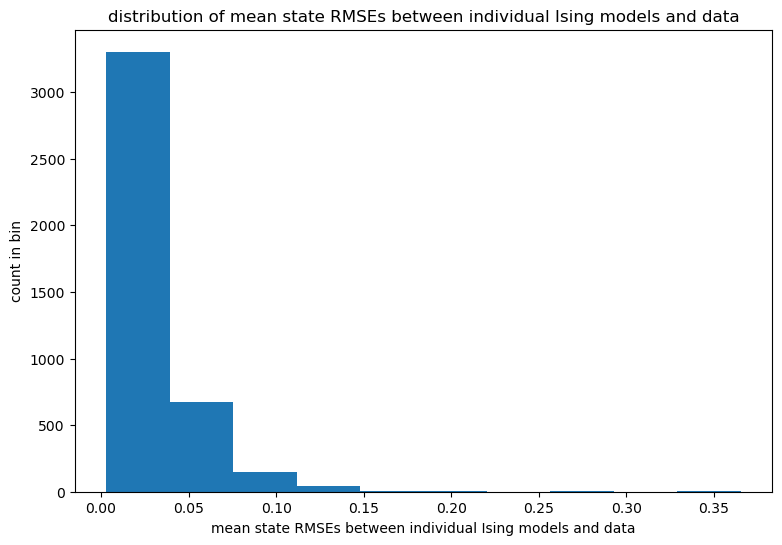

The distribution of mean state RMSEs between individual Ising models and data values has median 0.0206 with 95% CI [0.00576, 0.0981] and range [0.00306, 0.365].


In [132]:
# name = 'RMSEs between individual mean states in Ising model simulation and binarized data'
name = 'mean state RMSEs between individual Ising models and data'
values = mean_state_rmse
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

In [133]:
mean_state_product_rmse_file = os.path.join(data_dir, f'mean_state_product_rmse_{results_file_suffix}')
mean_state_product_rmse = torch.load(mean_state_product_rmse_file)
print( 'mean_state_product_rmse size', mean_state_product_rmse.size() )

mean_state_product_rmse size torch.Size([4190])


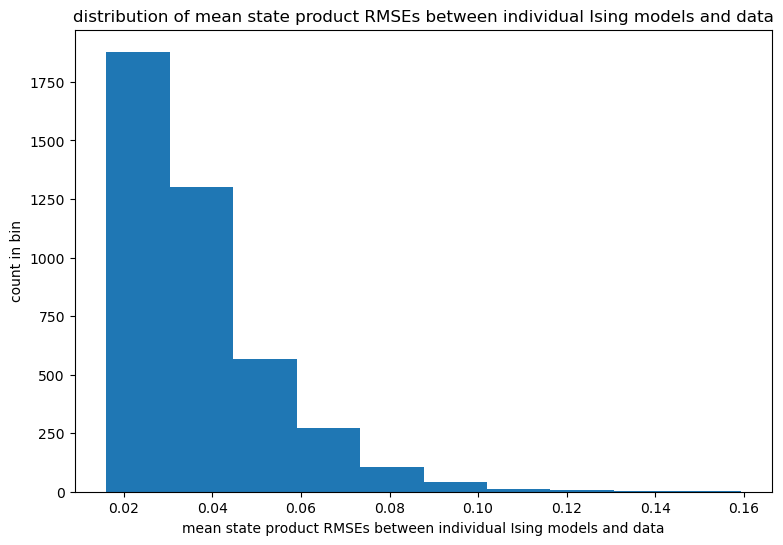

The distribution of mean state product RMSEs between individual Ising models and data values has median 0.032 with 95% CI [0.0197, 0.0809] and range [0.0161, 0.159].


In [134]:
# name = 'RMSEs between individual mean state pair products in Ising model simulation and binarized data'
name = 'mean state product RMSEs between individual Ising models and data'
values = mean_state_product_rmse
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

In [135]:
fc_rmse_file = os.path.join(data_dir, f'fc_rmse_{results_file_suffix}')
fc_rmse = torch.load(fc_rmse_file)
print( 'fc_rmse size', fc_rmse.size() )

fc_rmse size torch.Size([4190])


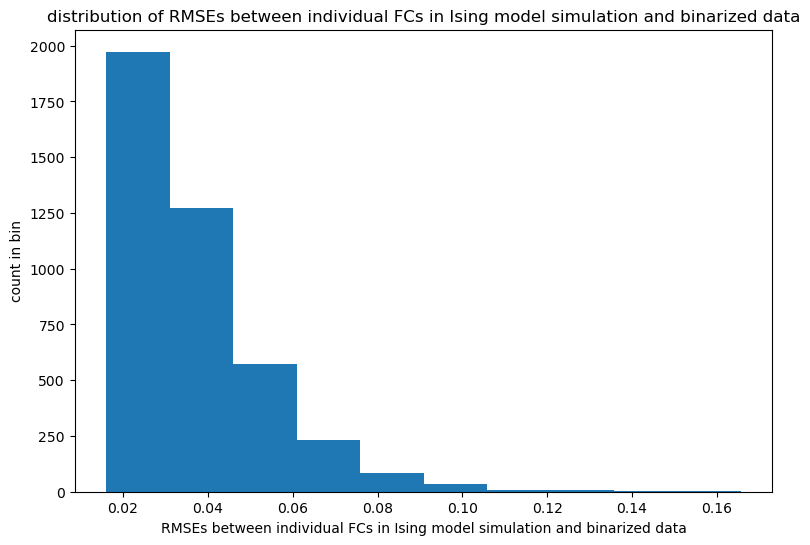

The distribution of RMSEs between individual FCs in Ising model simulation and binarized data values has median 0.032 with 95% CI [0.0197, 0.0798] and range [0.0161, 0.166].


In [136]:
name = 'RMSEs between individual FCs in Ising model simulation and binarized data'
values = fc_rmse
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

In [137]:
fc_correlation_file = os.path.join(data_dir, f'fc_correlation_{results_file_suffix}')
fc_correlation = torch.load(fc_correlation_file)
print( 'fc_correlation size', fc_correlation.size() )

fc_correlation size torch.Size([4190])


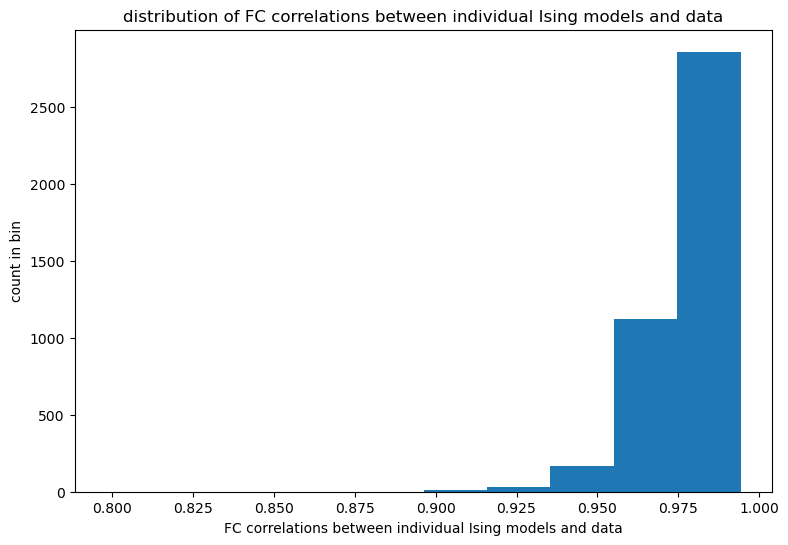

The distribution of FC correlations between individual Ising models and data values has median 0.98 with 95% CI [0.947, 0.99] and range [0.798, 0.994].


In [138]:
# name = 'Correlations between individual FCs in Ising model simulation and binarized data'
name = 'FC correlations between individual Ising models and data'
values = fc_correlation
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

In [87]:
combined_mean_state_rmse_file = os.path.join(data_dir, f'combined_mean_state_rmse_{results_file_suffix}')
combined_mean_state_rmse = torch.load(combined_mean_state_rmse_file)
print( 'combined_mean_state_rmse size', combined_mean_state_rmse.size() )

combined_mean_state_rmse size torch.Size([4190])


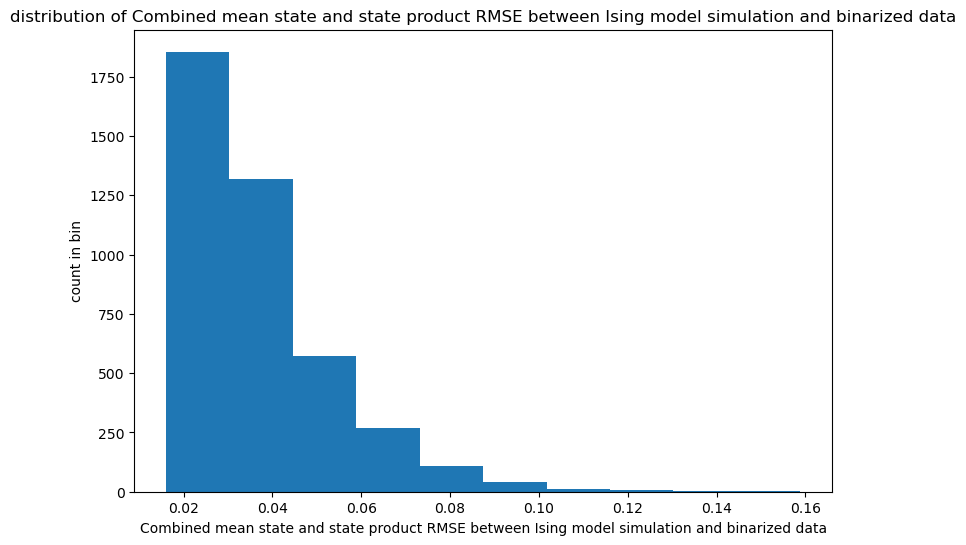

The distribution of Combined mean state and state product RMSE between Ising model simulation and binarized data values has median 0.0321 with 95% CI [0.0197, 0.0807] and range [0.0161, 0.159].


In [88]:
name = 'Combined mean state and state product RMSE between Ising model simulation and binarized data'
values = combined_mean_state_rmse
make_histogram(name=name, values=values)
print_stats(name=name, values=values)

In [89]:
num_models = combined_mean_state_rmse.numel()
betas_per_subject = 5
num_subjects = num_models//betas_per_subject
combined_mean_state_rmse_by_subject = torch.unflatten( combined_mean_state_rmse, dim=0, sizes=(betas_per_subject, num_subjects) )
print( combined_mean_state_rmse_by_subject.size() )

torch.Size([5, 838])


In [90]:
subject_min_rmse = combined_mean_state_rmse_by_subject.min(dim=0).values
print( 'subject_min_rmse size', subject_min_rmse.size() )
max_subject_min_rmse = subject_min_rmse.max()
print( f'highest min RMSE for any subject is {max_subject_min_rmse:.3g}')

subject_min_rmse size torch.Size([838])
highest min RMSE for any subject is 0.0529


In [100]:
rmse_threshold = max_subject_min_rmse
num_good = torch.count_nonzero(combined_mean_state_rmse < rmse_threshold)
total = combined_mean_state_rmse.numel()
fraction_good = num_good/total
print(f'{num_good} out of {total} Ising models, {100*fraction_good:.3g}%, have combined RMSE less than {rmse_threshold:.3g}.')

3564 out of 4190 Ising models, 85.1%, have combined RMSE less than 0.0529.


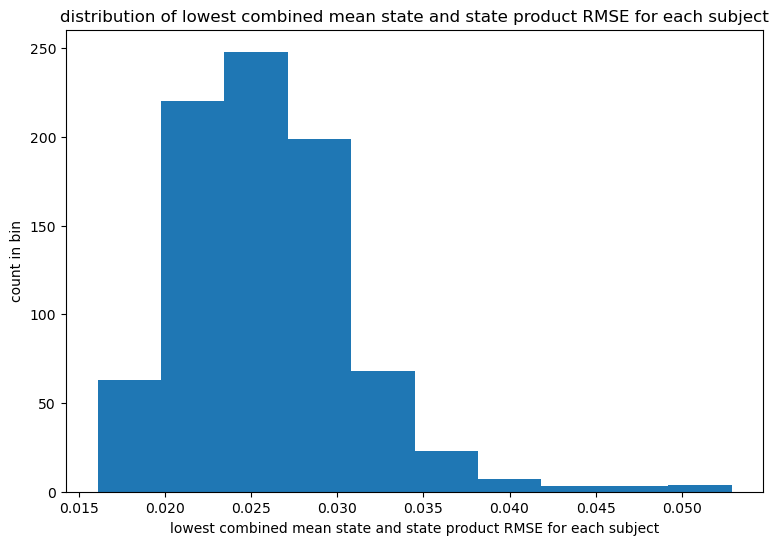

The distribution of lowest combined mean state and state product RMSE for each subject values has median 0.0251 with 95% CI [0.0182, 0.0372] and range [0.0161, 0.0529].


In [101]:
name = 'lowest combined mean state and state product RMSE for each subject'
values = subject_min_rmse
make_histogram(name=name, values=values)
print_stats(name=name, values=values)